In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.metrics import accuracy_score
import pickle
import os
from sklearn.model_selection import KFold
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
#DHIKSHI
#train=pd.read_csv("train (3).csv")
#train.head()
#test=pd.read_csv("test (2).csv")
#test.head()

In [182]:
#ABI
train=pd.read_csv("/content/drive/MyDrive/train.csv")
train.head()
test=pd.read_csv("/content/drive/MyDrive/test.csv")
test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [183]:
train.columns.values

array(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [184]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [185]:
print('Shape of Train Data: ', train.shape)
print('Shape of Test Data: ',test.shape)

Shape of Train Data:  (4250, 20)
Shape of Test Data:  (750, 20)


In [186]:
string_columns = train.select_dtypes(include=['object'])
print(string_columns)

     state      area_code international_plan voice_mail_plan churn
0       OH  area_code_415                 no             yes    no
1       NJ  area_code_415                 no              no    no
2       OH  area_code_408                yes              no    no
3       OK  area_code_415                yes              no    no
4       MA  area_code_510                 no             yes    no
...    ...            ...                ...             ...   ...
4245    MT  area_code_415                 no              no    no
4246    WV  area_code_408                 no              no    no
4247    NC  area_code_408                 no              no    no
4248    HI  area_code_408                 no             yes    no
4249    VT  area_code_415                 no             yes    no

[4250 rows x 5 columns]


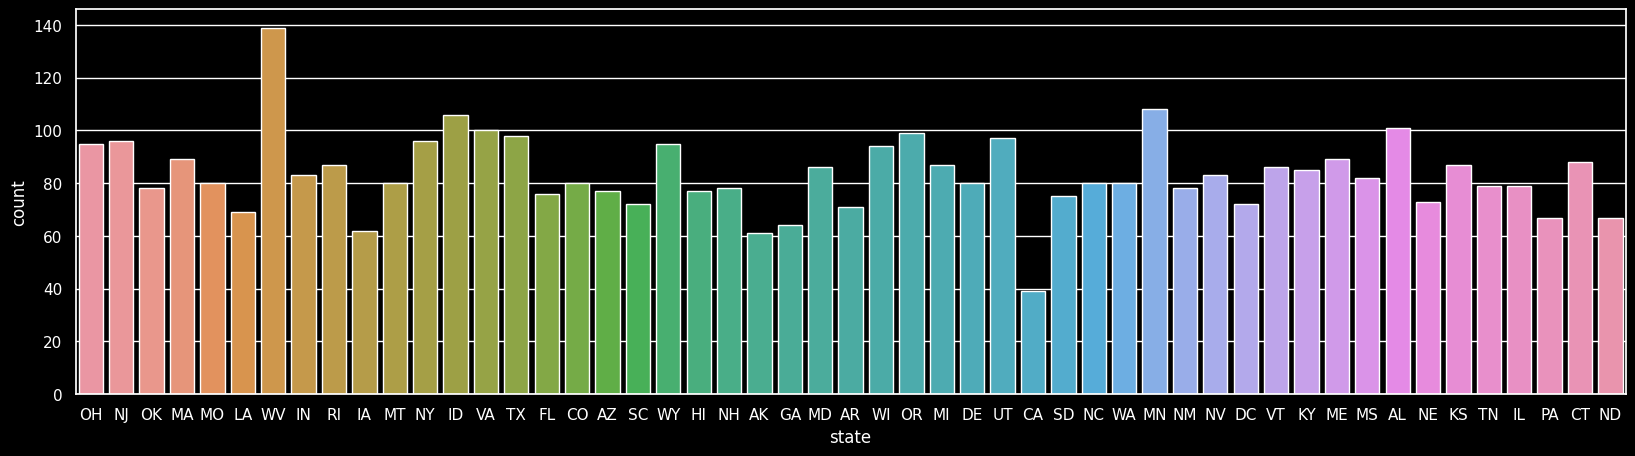

In [187]:
plt.style.use('dark_background')
for column in string_columns:
    if(column=="state"):
      plt.figure(figsize=(20,5))
      sns.countplot(x=column, data=string_columns)
      plt.show()

In [188]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [208]:
import plotly.offline as py
trace = go.Pie(labels = train["churn"].value_counts().keys().tolist(),
               values = train["churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<ipython-input-189-f51ccc527b5e>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



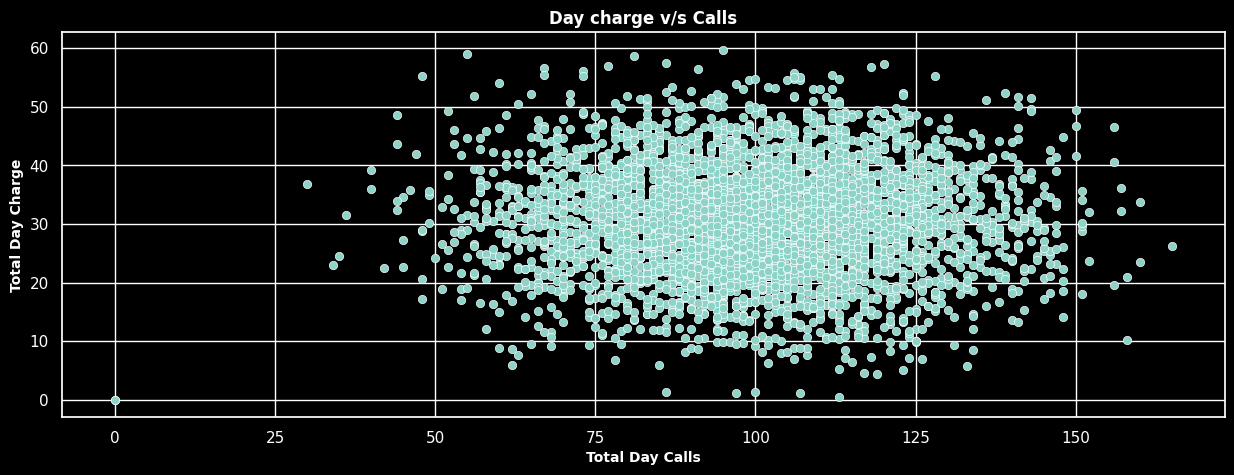

In [189]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=train, x='total_day_calls', y='total_day_charge', palette='viridis')
plt.xlabel('Total Day Calls', fontsize=10, fontweight='bold')
plt.ylabel('Total Day Charge', fontsize=10, fontweight='bold')
plt.title('Day charge v/s Calls', fontsize=12, fontweight='bold')
plt.show()

In [190]:
cat_cols = ['state','area_code','international_plan','voice_mail_plan','churn']

#converts the selected columns to the 'category' data type using .astype('category')
train[cat_cols] = train[cat_cols].astype('category')

#The [cat_cols[:-1]] part selects all categorical columns except for the last one - 'churn'.
test[cat_cols[:-1]] = test[cat_cols[:-1]].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

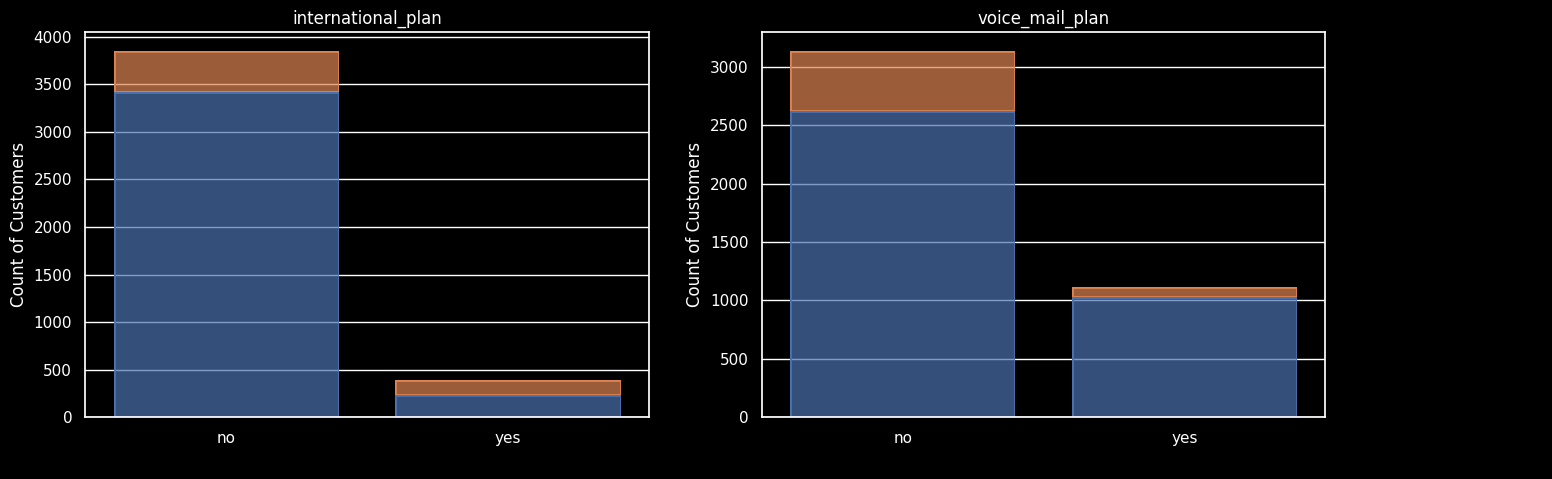

In [191]:
import seaborn.objects as so
fig, ax = plt.subplots(1,2,figsize=(16,5))

for col,subplot in zip(cat_cols[2:-1], ax.flatten()):
    f = (
        so.Plot(train, x=col, color='churn')
        .add(so.Bar(), so.Count(), so.Stack())
        .label(x=" ", y="Count of Customers", title=col)
        .on(subplot).plot()
    )

plt.show()

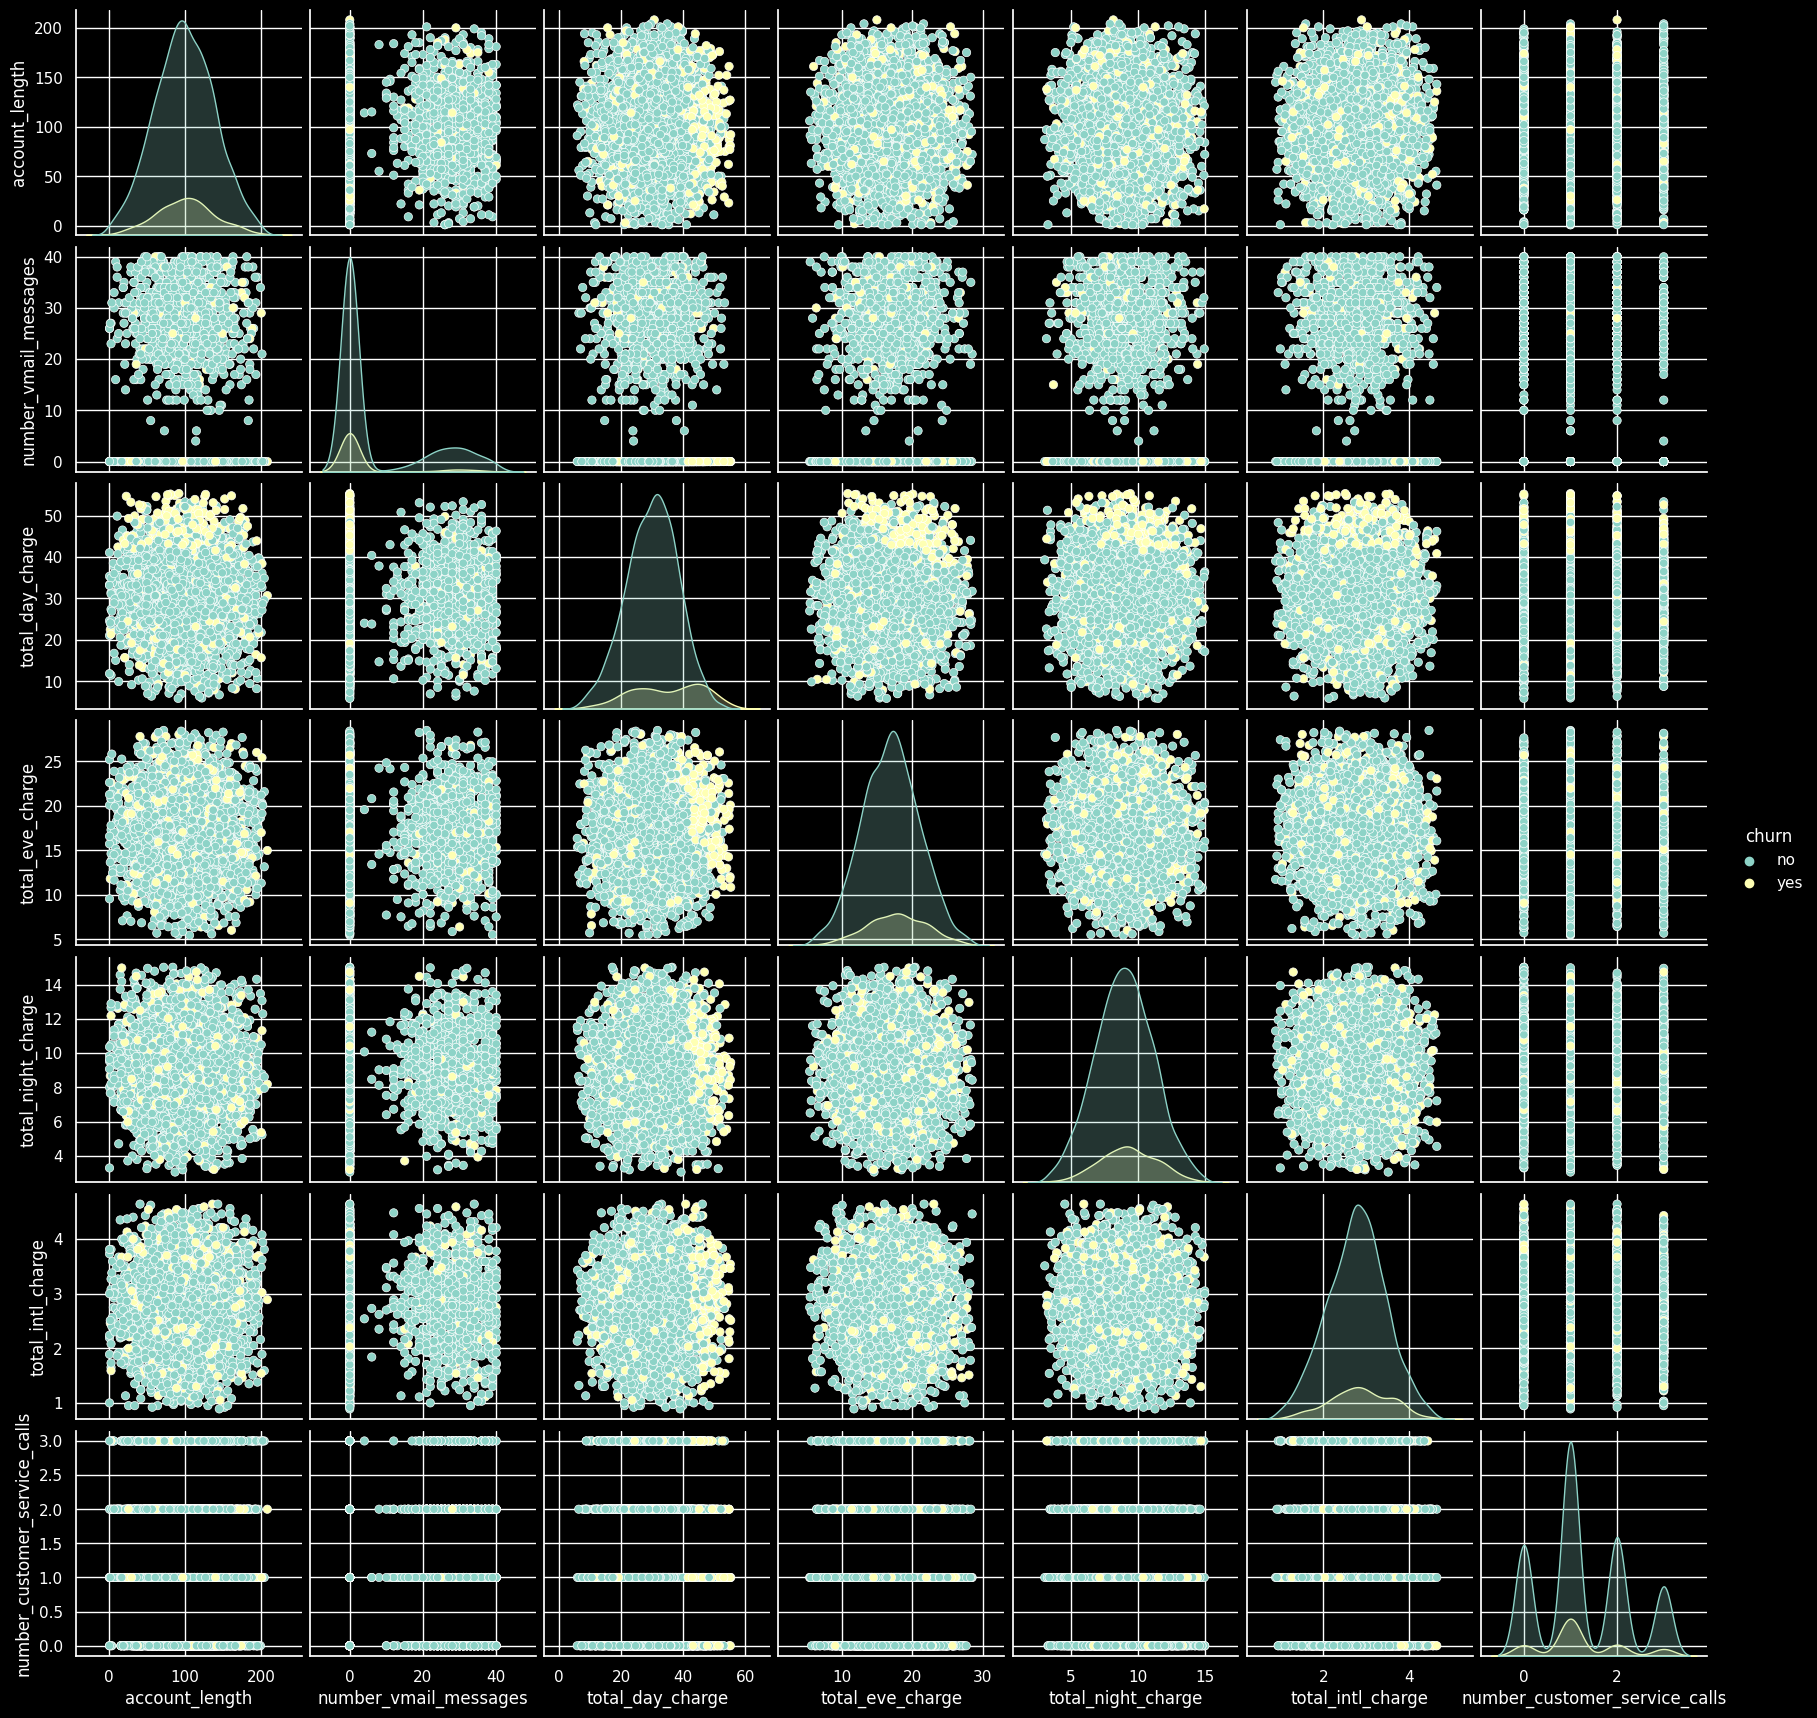

In [211]:
sns.pairplot(train,vars=['account_length','number_vmail_messages', 'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_customer_service_calls'],hue='churn')

OUTLIER CHECK

In [192]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train['total_intl_charge'])


Outliers: [5.4, 0.0, 5.1, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11, 5.21, 5.18, 0.0, 5.32, 0.0, 0.0, 0.3, 5.32]


In [193]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['number_vmail_messages'])

Outliers: [41, 41, 46, 42, 43, 41, 48, 41, 45, 41, 46, 43, 42, 45, 41, 43, 42, 42, 42, 42, 43, 47, 44, 41, 44, 49, 44, 43, 42, 47, 42, 42, 43, 45, 42, 42, 45, 45, 41, 42, 43, 46, 44, 50, 44, 41, 50, 42, 47, 44, 43, 41, 44, 43, 42, 43, 41, 46, 45, 49, 46, 49, 41, 41, 42, 45, 42, 42, 43, 41, 41, 41, 47, 41, 46, 45, 46, 45, 48, 43, 45, 48, 52, 48, 43, 41]


In [194]:
num_cols = train.select_dtypes(include=['int','float']).columns
i = ['tr'+str(n) for n in range(1,16)]

fig = make_subplots(rows=5, cols=3,
                    subplot_titles=[f'{col} Box Plot' for col in num_cols],
                   vertical_spacing=0.03)

for index,(col,trace) in enumerate(zip(num_cols, i)):
    trace = go.Box(y=train[col], boxmean=True, name=col)
    fig.add_trace(trace, row=(index//3)+1, col=(index%3)+1)

fig.update_layout(height=2000, width=1000,
                  title_text="Outlier Check in Numerical Columns",
                  showlegend=False)
fig.show()

REPLACING OUTLIERS WITH MEDIAN

In [195]:
def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)

        median = df[col].median()

        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])

replace_outliers(train,num_cols)

VISUALISING AFTER REPLACING OUTLIERS

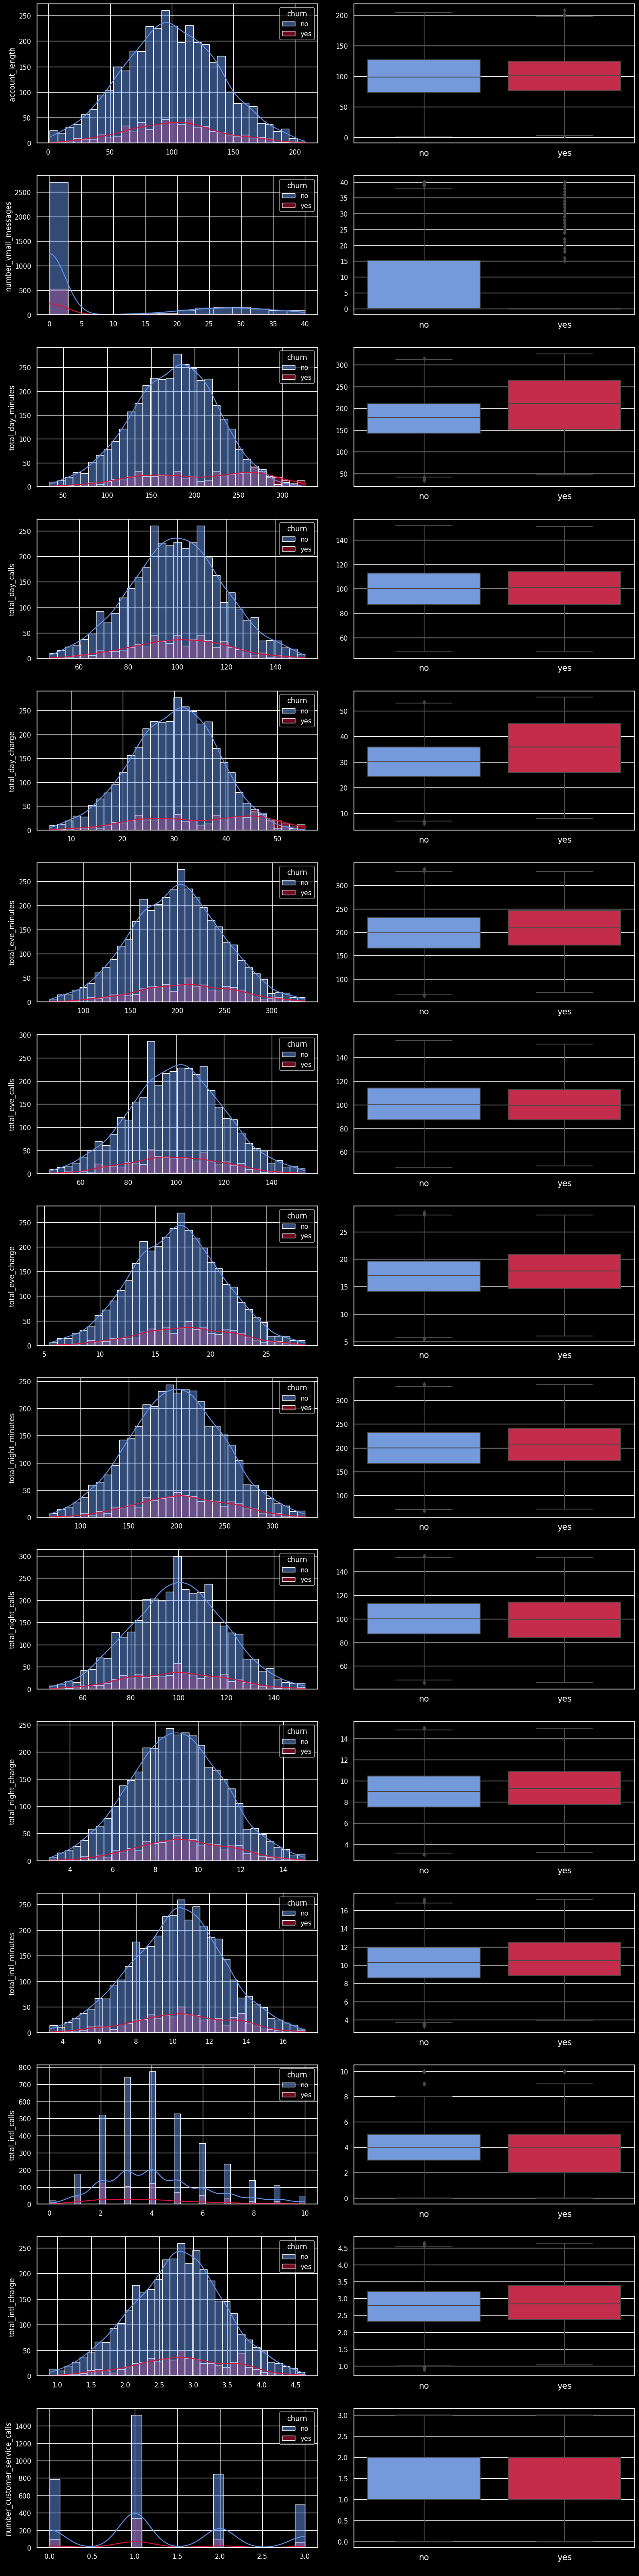

In [196]:
fig, ax = plt.subplots(15,2,figsize=(15,60))
i=0
color_dict = {'no': matplotlib.colors.to_rgba('cornflowerblue', 0.3),
              'yes': matplotlib.colors.to_rgba('crimson', 1)}
for col in num_cols:
    sns.histplot(data=train, x=col, hue='churn', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=train, y=col, x='churn', ax=ax[i,1],
               palette=('cornflowerblue', 'crimson'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

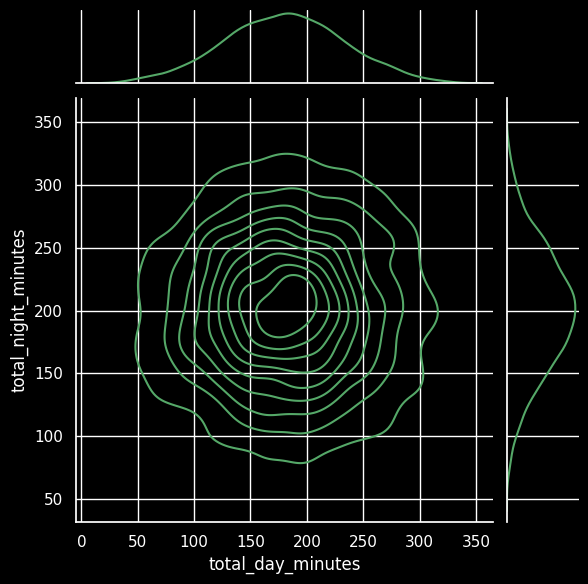

In [197]:
g = sns.jointplot(x='total_day_minutes', y='total_night_minutes', kind='kde', color='g', data=train)

CORRELATION

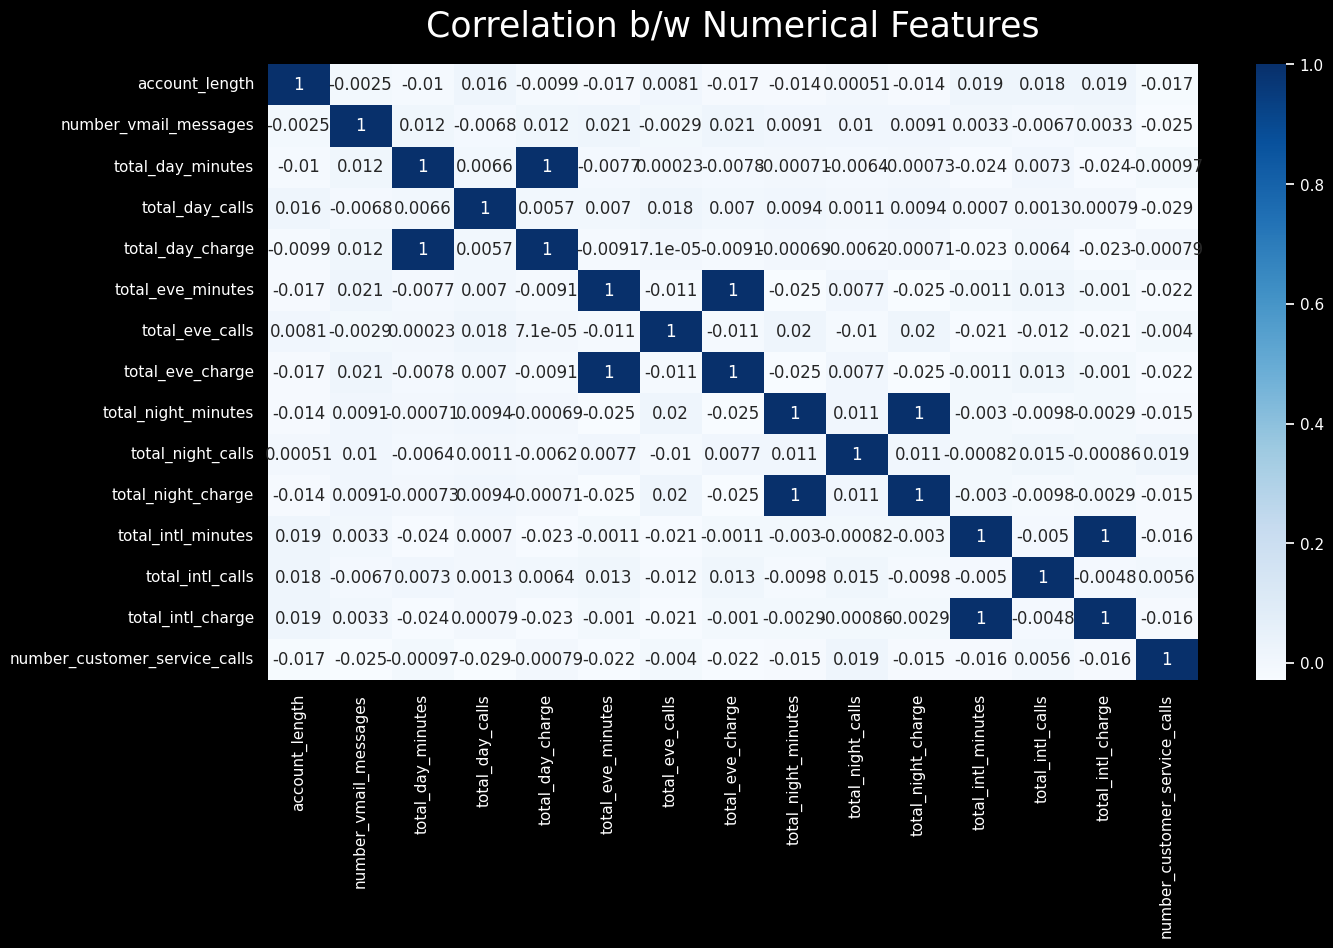

In [212]:
table = train[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

REMOVING FULLY CORRELATED COLUMNS

In [213]:
for data in [train, test]:
    data.drop(columns=['total_day_charge',
                       'total_eve_charge',
                      'total_night_charge',
                      'total_intl_charge'], inplace=True)

train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH           107.0  area_code_415                 no             yes   
1    NJ           137.0  area_code_415                 no              no   
2    OH            84.0  area_code_408                yes              no   
3    OK            75.0  area_code_415                yes              no   
4    MA           121.0  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                   26.0              161.6            123.0   
1                    0.0              243.4            114.0   
2                    0.0              299.4             71.0   
3                    0.0              166.7            113.0   
4                   24.0              218.2             88.0   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              195.5            103.0                254.4              103.0   
1              121.2            110.0                162.6              104.0   
2              200.7             88.0                196.9               89.0   
3              148.3            122.0                186.9              121.0   
4              200.7            108.0                212.6              118.0   

   total_intl_minutes  total_intl_calls  number_customer_service_calls churn  
0                13.7               3.0                            1.0    no  
1                12.2               5.0                            0.0    no  
2                 6.6               7.0                            2.0    no  
3                10.1               3.0                            3.0    no  
4                 7.5               7.0                            3.0    no

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

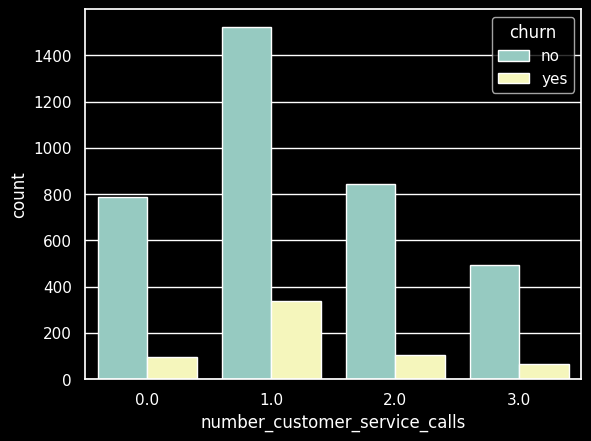

In [214]:
sns.countplot(x="number_customer_service_calls", hue="churn", data=train)

OVERSAMPLING USING SMOTE

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in string_columns:
  train[column]=le.fit_transform(train[column])

In [216]:
train['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [217]:
X = train.drop(columns='churn', axis=1)
Y = train['churn']
X.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_eve_minutes                0
total_eve_calls                  0
total_night_minutes              0
total_night_calls                0
total_intl_minutes               0
total_intl_calls                 0
number_customer_service_calls    0
dtype: int64

In [218]:
print(X.shape,Y.shape)
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X, Y)
y_smote.value_counts()

(4250, 15) (4250,)


0    3652
1    3652
Name: churn, dtype: int64

In [219]:
from sklearn.datasets import make_classification

oversampled_data = pd.DataFrame(data=x_smote,columns=x_smote.columns)
oversampled_data['churn']=y_smote
oversampled_data.shape
oversampled_data =oversampled_data.sample(frac=1)
print(Counter(y_smote),oversampled_data.shape)

Counter({0: 3652, 1: 3652}) (7304, 16)


In [220]:
x=oversampled_data.drop(['churn'],axis=1)
y=oversampled_data['churn']

In [221]:
x.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
4440     17      144.820098          0                   0                0   
2421      1      141.000000          2                   0                1   
3132     16       24.000000          2                   0                1   
2938     30      148.000000          2                   0                0   
886      16       67.000000          0                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4440                    0.0         258.064478        98.454795   
2421                   28.0         308.000000       123.000000   
3132                    0.0         187.100000        80.000000   
2938                    0.0         168.800000       102.000000   
886                     0.0         201.400000       101.000000   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
4440         259.731597        99.773519           167.495525   
2421         247.800000       128.000000           152.900000   
3132         286.100000        77.000000           188.000000   
2938         248.100000       125.000000           250.700000   
886           97.600000       122.000000           202.500000   

      total_night_calls  total_intl_minutes  total_intl_calls  \
4440          106.36347           12.413607          4.409133   
2421          103.00000            7.400000          3.000000   
3132          107.00000           10.400000          2.000000   
2938           96.00000           10.600000          4.000000   
886           119.00000            7.000000          3.000000   

      number_customer_service_calls  
4440                       2.590867  
2421                       1.000000  
3132                       1.000000  
2938                       1.000000  
886                        0.000000

In [222]:
from sklearn.preprocessing import StandardScaler

# Assuming X contains only the float variables you want to scale

# List of float numerical columns
float_numerical_columns = [
    'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
    'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls',
    'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls'
]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standard scaling to the float numerical columns in X
x[float_numerical_columns] = scaler.fit_transform(x[float_numerical_columns])

# Now, X contains the scaled float numerical features
x.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
4440     17        1.205447          0                   0                0   
2421      1        1.101232          2                   0                1   
3132     16       -2.090593          2                   0                1   
2938     30        1.292196          2                   0                0   
886      16       -0.917529          0                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4440              -0.466179           1.113136        -0.101698   
2421               2.130459           1.952494         1.248770   
3132              -0.466179          -0.079694        -1.117075   
2938              -0.466179          -0.387295         0.093358   
886               -0.466179           0.160673         0.038338   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
4440           1.160057        -0.010348            -0.760642   
2421           0.911934         1.534121            -1.074359   
3132           1.708401        -1.256446            -0.319917   
2938           0.918172         1.369970             1.027760   
886           -2.211547         1.205819            -0.008253   

      total_night_calls  total_intl_minutes  total_intl_calls  \
4440           0.384529            0.845285          0.148574   
2421           0.204018           -1.257156         -0.584722   
3132           0.418690            0.000885         -1.105111   
2938          -0.171658            0.084754         -0.064334   
886            1.062707           -1.424895         -0.584722   

      number_customer_service_calls  
4440                       1.582761  
2421                      -0.298291  
3132                      -0.298291  
2938                      -0.298291  
886                       -1.480697

In [223]:
models=[
    #Ensemble
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(max_iter=100),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5843, 15), (1461, 15), (5843,), (1461,))

In [225]:
# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, x, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

In [226]:
final_model=XGBClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)
accuracy_score(test_pred, y_test)

0.9493497604380561

In [227]:
final_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [228]:
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    # Calculate confusion matrix
    cm_test = confusion_matrix(y_test, y_hat_test)
    cm_train = confusion_matrix(y_train, y_hat_train)

    #plot_confusion_matrix(y_test,y_hat_test)
    # Display confusion matrix for Test Data
    print('Confusion Matrix for Test Data:')
    printd=pd.DataFrame(cm_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
    printd
    # Display confusion matrix as a plot
    plt.figure(figsize=(2, 1))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Display confusion matrix for Train Data
    print('\n\nConfusion Matrix for Train Data:')
    printd=pd.DataFrame(cm_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
    # Display confusion matrix for the training data as a plot
    plt.figure(figsize=(2, 1))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f'Test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'Train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n',pd.crosstab(y_test, y_hat_test,rownames=['Actual'],colnames=['Predicted'],margins = True))
    print('\nTest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\nTrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)
    print('\n\n')

Model: XGBCLASSIFIFER
------------------------------------------------------------
Confusion Matrix for Test Data:


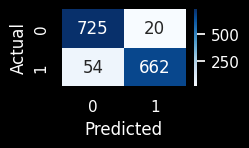



Confusion Matrix for Train Data:


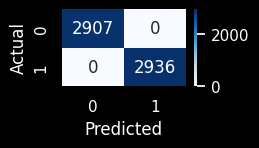

Test accuracy: 0.95
Train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1   All
Actual                   
0          725   20   745
1           54  662   716
All        779  682  1461

Test report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       745
           1       0.97      0.92      0.95       716

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      1.00      1.00      2936

    accuracy                           1.00      5843
   macro avg       1.00      1.00      1.00      5843


In [229]:
metrics("XGBCLASSIFIFER",y_train,y_test,train_pred,test_pred)

In [230]:
param_grid = {
    'n_estimators': [50,100,200,300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.1, 1, 2],  # L1 regularization term (alpha)
    'lambda': [0, 0.1, 1, 2]  # L2 regularization term (lambda)
}


In [231]:

kf = KFold(n_splits=5, shuffle=True, random_state=4305)

In [232]:


# Get the number of CPU cores
num_cpus = os.cpu_count()

print(f"Number of CPU cores in your laptop: {num_cpus}")


Number of CPU cores in your laptop: 2


In [233]:
xgb_model = XGBClassifier(objective='binary:logistic')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5,verbose=3,n_jobs=8)
"""grid_search.fit(x_train, y_train)"""

'grid_search.fit(x_train, y_train)'

In [234]:
"""results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.head(20)"""

"results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)\nresults.head(20)"

In [235]:
"""best_estimator = grid_search.best_estimator_
model_filename = "best_estimator_xgboost.pkl"

# Save the best estimator to a file using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_estimator, model_file)

print(f"Best estimator saved to {model_filename}")"""

'best_estimator = grid_search.best_estimator_\nmodel_filename = "best_estimator_xgboost.pkl"\n\n# Save the best estimator to a file using pickle\nwith open(model_filename, \'wb\') as model_file:\n    pickle.dump(best_estimator, model_file)\n\nprint(f"Best estimator saved to {model_filename}")'

In [236]:
"""grid_search.best_estimator_"""

'grid_search.best_estimator_'

In [237]:
with open("/content/best_estimator_xgboost.pkl", 'rb') as model_file:
        local_model = pickle.load(model_file)

In [238]:
y_pred = local_model.predict(x_test)

In [239]:
accuracy_score(y_test,y_pred)

0.9890485968514716

**FEDERATED LEARNING**


In [240]:
# Number of clients
num_clients = 3

# Define a function to split the data for each client
def split_data_for_client(client_id):
    start = int(client_id * len(x_train) / num_clients)
    end = int((client_id + 1) * len(x_train) / num_clients)
    client_X_train = x_train[start:end]
    client_y_train = y_train[start:end]
    return client_X_train, client_y_train

# Create dictionaries to store data
client_data = {}

# Split the data and store it for all clients
for client_id in range(num_clients):
    client_X_train, client_y_train = split_data_for_client(client_id)

    # Store the split data for each client
    client_data1 = {
        'X_train': client_X_train,
        'y_train': client_y_train,
    }
    client_data[client_id] = client_data1



In [241]:
client_data

{0: {'X_train':       state  account_length  area_code  international_plan  voice_mail_plan  \
  3102     26       -0.180954          2                   0                0   
  5032     24        0.462608          0                   0                0   
  2677      2        0.719305          1                   1                0   
  4846     44        2.026889          2                   0                0   
  6671      5        0.086025          1                   0                0   
  ...     ...             ...        ...                 ...              ...   
  4204     24        1.455880          1                   0                0   
  2052     31       -1.135773          2                   0                0   
  2570      7       -0.835687          1                   0                0   
  1084     14        0.173693          1                   0                1   
  3741      0       -1.599543          1                   0                0   
  
        num

In [242]:
"""num_clients = len(client_data)  # Number of local clients

for client_id in range(num_clients):
    grid_search.fit(client_data[client_id]['X_train'],client_data[client_id]['y_train'])
    model_filename = "FL_XGBoost_Client " + str(client_id)

    with open(model_filename, 'wb') as model_file:
        pickle.dump(grid_search.best_estimator_, model_file)
    print(f"Local model for client {client_id} saved to {model_filename}")
    """

'num_clients = len(client_data)  # Number of local clients\n\nfor client_id in range(num_clients):\n    grid_search.fit(client_data[client_id][\'X_train\'],client_data[client_id][\'y_train\'])\n    model_filename = "FL_XGBoost_Client " + str(client_id)\n    \n    with open(model_filename, \'wb\') as model_file:\n        pickle.dump(grid_search.best_estimator_, model_file)\n    print(f"Local model for client {client_id} saved to {model_filename}")\n    '

In [243]:
# Global model (initialized)
global_model = XGBClassifier()

client_models={}

for client_id, data in client_data.items():
    model_filename = "/content/FL_XGBoost_Client " + str(client_id) + ".unknown"

    with open(model_filename, 'rb') as model_file:
        local_model=pickle.load(model_file)
    client_models[client_id]=local_model


client_model_params=[]
for client_id in range(3):
    client_model_params.append(client_models[client_id].get_params())

In [244]:
client_models

{0: XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.9, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.1, learning_rate=0.1,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None, ...),
 1: XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=N

In [245]:
client_model_params

[{'objective': 'binary:logistic',
  'base_score': None,
  'booster': None,
  'callbacks': None,
  'colsample_bylevel': None,
  'colsample_bynode': None,
  'colsample_bytree': 0.9,
  'device': None,
  'early_stopping_rounds': None,
  'enable_categorical': False,
  'eval_metric': None,
  'feature_types': None,
  'gamma': None,
  'grow_policy': None,
  'importance_type': None,
  'interaction_constraints': None,
  'learning_rate': 0.1,
  'max_bin': None,
  'max_cat_threshold': None,
  'max_cat_to_onehot': None,
  'max_delta_step': None,
  'max_depth': 5,
  'max_leaves': None,
  'min_child_weight': None,
  'missing': nan,
  'monotone_constraints': None,
  'multi_strategy': None,
  'n_estimators': 200,
  'n_jobs': None,
  'num_parallel_tree': None,
  'random_state': None,
  'reg_alpha': None,
  'reg_lambda': None,
  'sampling_method': None,
  'scale_pos_weight': None,
  'subsample': 0.9,
  'tree_method': None,
  'validate_parameters': None,
  'verbosity': None,
  'alpha': 0,
  'lambda': 0.1}

In [246]:
"""# Aggregate local gradients at the central server (simple averaging for illustration)
aggregated_params = {}

numeric_params = {}
non_numeric_params = {}


# Separate numeric and non-numeric parameters

for param in client_model_params[0]:
    if param in ['n_estimators','max_depth']:
        # Round off the number of iterations and max depth to the nearest integer
        numeric_params[param] = round(sum([local_params[param] for local_params in client_model_params]) / len(client_model_params))
    elif all(isinstance(local_params[param], (int, float)) for local_params in client_model_params):
        # Leave other numeric parameters as they are
        numeric_params[param] = sum([local_params[param] for local_params in client_model_params]) / len(client_model_params)
    else:
        non_numeric_params[param] = client_model_params[0][param]  # Assume non-numeric parameter is same for all clients



# Update aggregated gradients with numeric parameters
aggregated_params.update(numeric_params)

# Handle non-numeric parameters (you can customize this part based on your use case)
for param, value in non_numeric_params.items():
    # Handle non-numeric parameters (for example, set them to a specific value)
    aggregated_params[param] = value

# Update the global model with aggregated parameters
global_model.set_params(**aggregated_params)

global_model.fit(x_train,y_train)



# Save the trained global model to a pickle file
with open('global_model.pkl', 'wb') as file:
    pickle.dump(global_model, file)
"""

"# Aggregate local gradients at the central server (simple averaging for illustration)\naggregated_params = {}\n\nnumeric_params = {}\nnon_numeric_params = {}\n\n\n# Separate numeric and non-numeric parameters\n\nfor param in client_model_params[0]:\n    if param in ['n_estimators','max_depth']:\n        # Round off the number of iterations and max depth to the nearest integer\n        numeric_params[param] = round(sum([local_params[param] for local_params in client_model_params]) / len(client_model_params))\n    elif all(isinstance(local_params[param], (int, float)) for local_params in client_model_params):\n        # Leave other numeric parameters as they are\n        numeric_params[param] = sum([local_params[param] for local_params in client_model_params]) / len(client_model_params)\n    else:\n        non_numeric_params[param] = client_model_params[0][param]  # Assume non-numeric parameter is same for all clients\n\n\n\n# Update aggregated gradients with numeric parameters\naggrega

In [247]:
with open('global_model.pkl', 'rb') as global_model:
    global_model=pickle.load(global_model)

In [248]:
y_pred=global_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(" Global model accuarcy is ",accuracy )

 Global model accuarcy is  0.9883641341546886


PATE


In [249]:
teacher_models = []

for client_id, client_model in client_models.items():
    teacher_models.append(client_model)
teacher_models

[XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.9, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.1, learning_rate=0.1,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None, ...),
 XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, f

In [250]:
def private_aggregate_teacher_predictions(oversampled_data, num_teachers, epsilon):

    teacher_predictions = []

    for teacher_model in teacher_models:
        teacher_pred = teacher_model.predict(x_test)
        teacher_predictions.append(teacher_pred)

    final_aggregated_predictions = []

    for i in range(len(x_test)):
        class_counts = [0, 0]

        for teacher_prediction in teacher_predictions:
            class_counts[teacher_prediction[i]] += 1

        noisy_counts = [count + np.random.laplace(scale=1/epsilon) for count in class_counts]

        max_votes = max(noisy_counts)
        selected_classes = [j for j, vote in enumerate(noisy_counts) if vote == max_votes]
        final_prediction = np.random.choice(selected_classes)

        final_aggregated_predictions.append(final_prediction)

    aggregated_accuracy_with_noise = accuracy_score(y_test, final_aggregated_predictions)
    print(f"Aggregated predictions accuracy with noise: {aggregated_accuracy_with_noise}")

    # Aggregation without noise
    final_aggregated_predictions_no_noise = []

    for i in range(len(x_test)):
        class_counts = [0, 0]

        for teacher_prediction in teacher_predictions:
            class_counts[teacher_prediction[i]] += 1

        max_votes = max(class_counts)
        selected_classes = [j for j, vote in enumerate(class_counts) if vote == max_votes]
        final_prediction = np.random.choice(selected_classes)

        final_aggregated_predictions_no_noise.append(final_prediction)

    aggregated_accuracy_no_noise = accuracy_score(y_test, final_aggregated_predictions_no_noise)
    print(f"Aggregated predictions accuracy without noise: {aggregated_accuracy_no_noise}")

    return final_aggregated_predictions, aggregated_accuracy_with_noise, final_aggregated_predictions_no_noise, aggregated_accuracy_no_noise

num_teachers = 5
epsilon = 1.0
aggregated_predictions, aggregated_accuracy_with_noise, aggregated_predictions_no_noise, aggregated_accuracy_no_noise = private_aggregate_teacher_predictions(oversampled_data, num_teachers, epsilon)
print("Final aggregated predictions with noise for all test data points:", aggregated_predictions)
print("Final aggregated predictions without noise for all test data points:", aggregated_predictions_no_noise)


Aggregated predictions accuracy with noise: 0.891854893908282
Aggregated predictions accuracy without noise: 0.9596167008898016
Final aggregated predictions with noise for all test data points: [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0